In [2]:
import sys
sys.path.append(r'C:\Users\ebers\Documents\GitHub Repositories\L02-PythonEngineeringLibrary')
from EngLib.Beam import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#### Problem Definition
b = 1.95
mass = 1.9
G_Loading = 6
g = 9.81
SF = 1.5

In [4]:
### Calculate a simulated distributed loading
r = 1

A = [[(b**3)/12,b],[(b**2)/4,(1-r)]]
B = [mass*g*G_Loading*SF,0]
a,c = np.linalg.solve(A,B)

def DistributedLoading(x):
    return a*x**2 + c

Known Loadings: [['q_dist_1', [86.02615384615385, 86.02615384615385], [0.0, 0.0975], 8.387550000000001, 0.048749999999999995, 0.0, 86.02615384615385], ['q_dist_2', [86.02615384615385, 86.02615384615385], [0.0975, 0.195], 8.387550000000001, 0.14625, 0.0, 86.02615384615385], ['q_dist_3', [86.02615384615385, 86.02615384615385], [0.195, 0.2925], 8.387549999999997, 0.24375, 0.0, 86.02615384615385], ['q_dist_4', [86.02615384615385, 86.02615384615385], [0.2925, 0.39], 8.387550000000003, 0.34125000000000005, 0.0, 86.02615384615385], ['q_dist_5', [86.02615384615385, 86.02615384615385], [0.39, 0.4875], 8.387549999999997, 0.43875000000000003, 0.0, 86.02615384615385], ['q_dist_6', [86.02615384615385, 86.02615384615385], [0.4875, 0.585], 8.387549999999997, 0.53625, 0.0, 86.02615384615385], ['q_dist_7', [86.02615384615385, 86.02615384615385], [0.585, 0.6825], 8.387550000000003, 0.63375, 0.0, 86.02615384615385], ['q_dist_8', [86.02615384615385, 86.02615384615385], [0.6825, 0.78], 8.387550000000003, 0

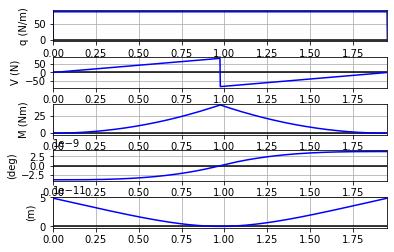

In [5]:
### Loadcase 1



UPW_LC1 = Beam(b)
UPW_LC1.add_fixed_support('a',b/2)


NumElemDist = 20


for i in range(NumElemDist):
    x0 = (i/NumElemDist)*b
    x1 = ((i+1)/NumElemDist)*b
    UPW_LC1.distributed_loading('dist_'+ str(i+1),[DistributedLoading(x0-b/2),DistributedLoading(x1-b/2)],[x0,x1])


UPW_LC1.solve_beam()
UPW_LC1.plot_beam_diagrams(save=False)


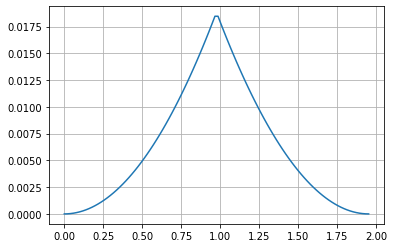

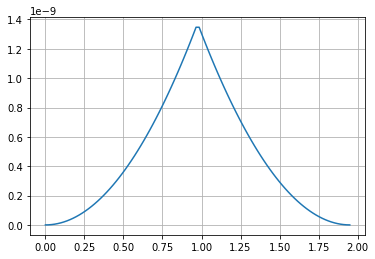

In [7]:
Sigma_yeild = 290E6     #https://www.matweb.com/search/DataSheet.aspx?MatGUID=57483b4d782940faaf12964a1821fb61&ckck=1
Height = 0.0195
Height_y = Height/2
Thickness = 0.0004

SpanThicknessPos = np.linspace(0,b,100)

#print(SpanThicknessPos)

Width = []
IValue = []

for i in SpanThicknessPos:
    Width.append((12*Height_y*UPW_LC1.EIv_prime2(i)/Sigma_yeild)/(Height**3 - (Height - 2*Thickness)**3))


for i in Width:
    IValue.append(((i * Height**3)/12)-((i * (Height-2*Thickness)**3)/12))


plt.figure(1)
plt.plot(SpanThicknessPos,Width)
plt.grid()

plt.figure(2)
plt.plot(SpanThicknessPos,IValue)
plt.grid()

plt.show()

